In [1]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



## 2. Create networks using preferential attachment model

## (a) The network is always connected becasue every newly added node will be conneceted to an old node.

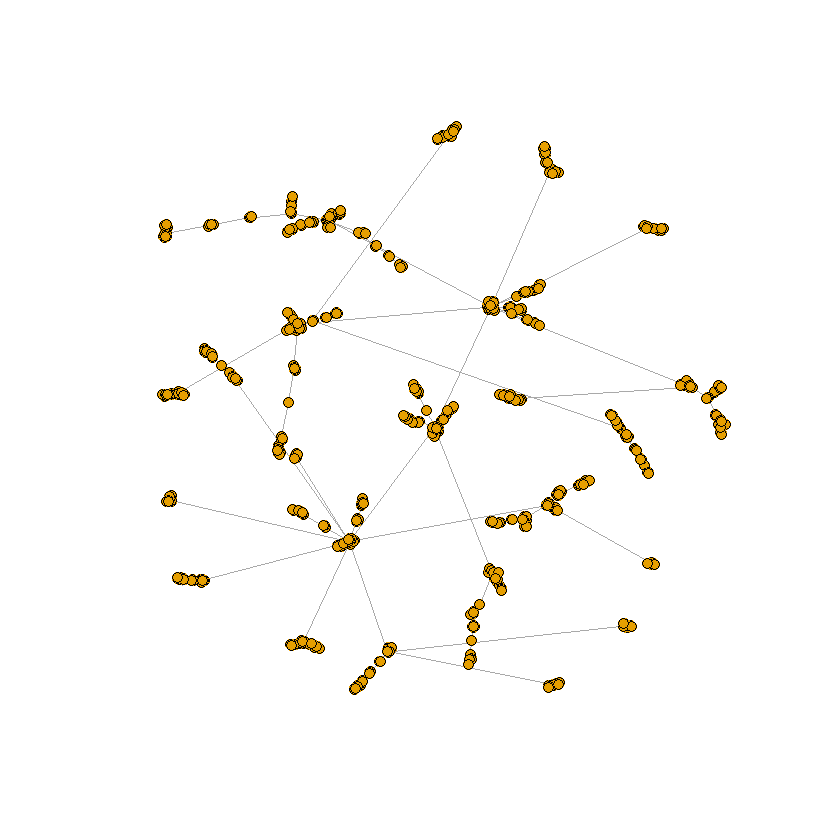

In [41]:
n=1000
g1 <- barabasi.game(n,1,directed=F)
plot(g1,vertex.size=4,vertex.label=NA,edge.length=10)

## (b) modularity=0.931

In [47]:
commu1<-cluster_fast_greedy(g1)
commu1
modularity(commu1)

IGRAPH clustering fast greedy, groups: 37, mod: 0.93
+ groups:
  $`1`
   [1]   2  18  46  48  71 118 123 162 185 208 220 230 237 278 294 303 310 313
  [19] 327 340 365 393 401 415 436 446 455 460 471 501 508 596 599 605 606 620
  [37] 637 653 660 672 675 683 684 723 727 729 760 777 786 808 850 851 857 886
  [55] 913 923 926 940 946 958 970 971
  
  $`2`
   [1]   3   6  55  62  66  77 146 176 194 233 247 254 282 320 322 326 328 341
  [19] 355 356 360 423 430 468 472 494 533 534 567 592 607 621 662 669 674 686
  [37] 778 784 787 798 822 831 838 885 895 912 927 929 948 965 986 987
  + ... omitted several groups/vertices

[1] 0.9310938

## (c) with n=10000, modularity=0.978, larger than the smaller-size graph.

IGRAPH clustering fast greedy, groups: 105, mod: 0.98
+ groups:
  $`1`
    [1]   74  120  151  215  226  240  314  356  459  529  565  569  571  599
   [15]  649  751  845  928  950  956 1026 1028 1038 1099 1125 1133 1223 1263
   [29] 1302 1309 1482 1579 1637 1653 1738 1917 1947 1956 1984 2005 2063 2074
   [43] 2078 2139 2448 2456 2584 2630 2660 2778 2825 2840 2854 2887 2917 2938
   [57] 2944 3090 3160 3205 3274 3317 3408 3494 3708 3710 3739 3871 3959 4095
   [71] 4165 4222 4319 4484 4506 4521 4615 4641 4654 4656 4692 4870 5152 5234
   [85] 5310 5466 5474 5504 5526 5572 5828 5837 5865 5904 5926 5966 6266 6353
   [99] 6364 6485 6500 6519 6578 6597 6616 6674 6793 6841 6852 6887 6890 6898
  [113] 6956 7004 7044 7064 7078 7242 7337 7404 7456 7469 7585 7600 7602 7663
  + ... omitted several groups/vertices

[1] 0.9784077

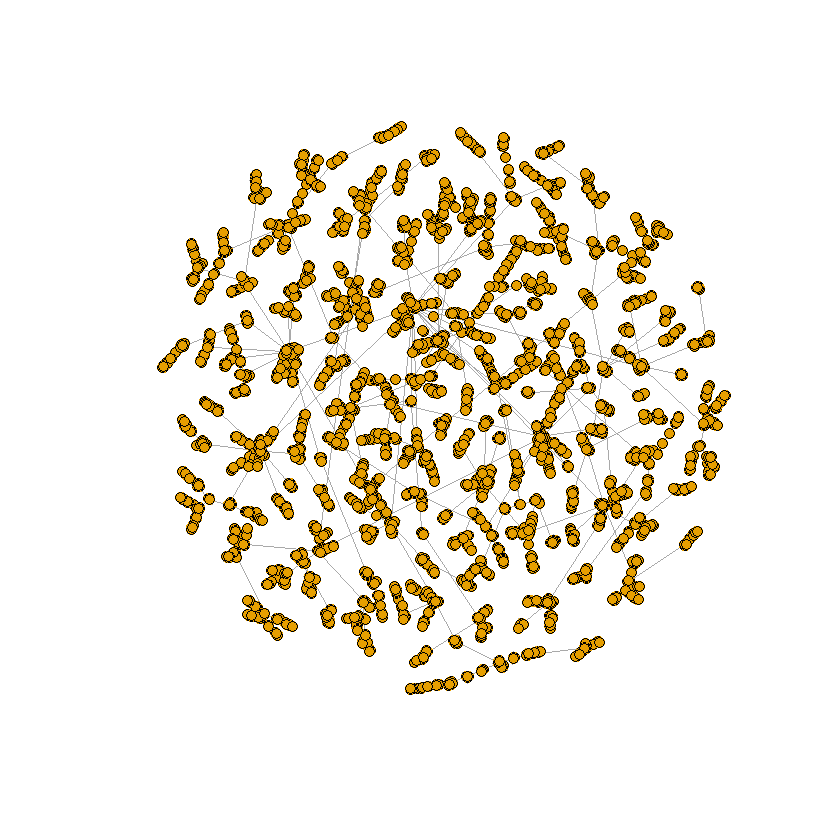

In [161]:
g2<-barabasi.game(10000,m=1,directed=F)
plot(g2,vertex.size=4,vertex.label=NA)
commu2<-cluster_fast_greedy(g2)
commu2
modularity(commu2)

## (d) the slope for g1=

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"18 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"27 y values <= 0 omitted from logarithmic plot"

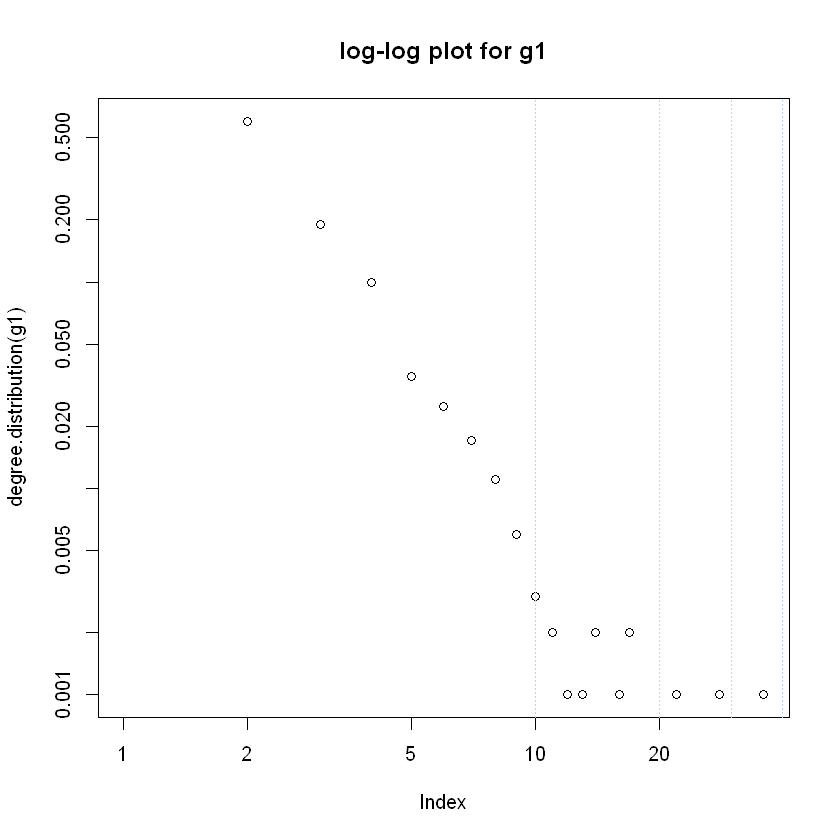

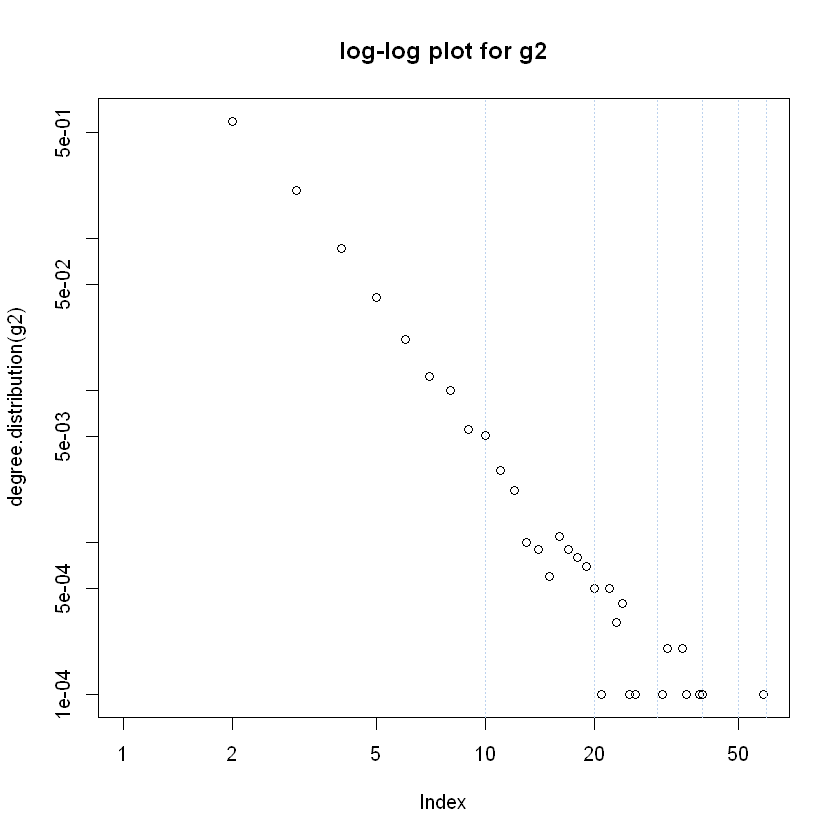

In [72]:
plot(degree.distribution(g1),log="yx",main="log-log plot for g1")
abline( h = seq( 0, 100, 10 ), lty = 3, col = colors()[ 440 ] )
abline( v = seq( 0, 100, 10 ), lty = 3, col = colors()[ 440 ] )
plot(degree.distribution(g2),log="xy",main="log-log plot for g2")
abline( h = seq( 0, 100, 10 ), lty = 3, col = colors()[ 440 ] )
abline( v = seq( 0, 100, 10 ), lty = 3, col = colors()[ 440 ] )

## (e) 

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"22 x values <= 0 omitted from logarithmic plot"

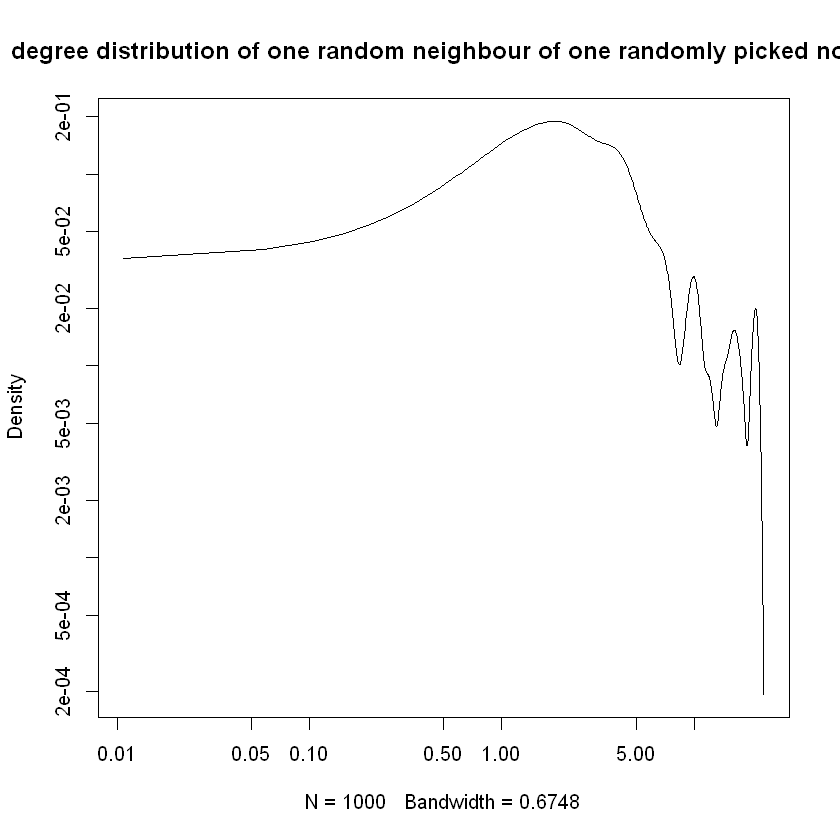

In [118]:
g3=barabasi.game(1000,m=1,directed=F)
deg=numeric(0)
for (i in 1:1000){
    nod1<-sample(1000,1)
    neigh<-neighbors(g3,nod1)
    nod2<-sample(length(neigh),1)
    nod2<-neigh[nod2]
    deg<-c(deg,degree(g3,nod2))
}
    plot(density(deg),log="xy",main="degree distribution of one random neighbour of one randomly picked node")

## (f)

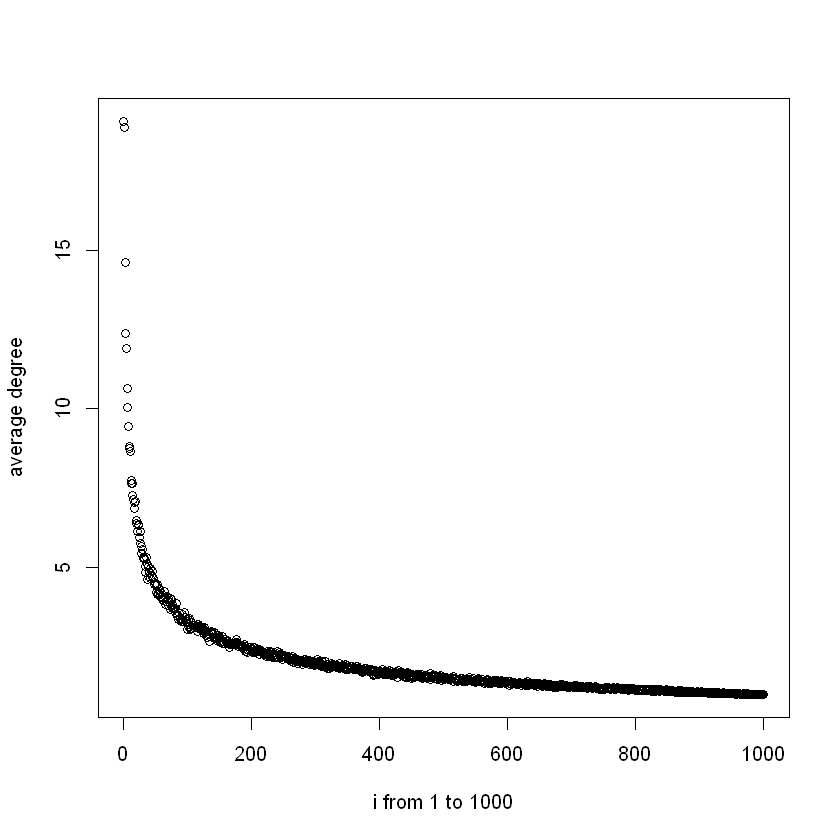

In [162]:
deg<-numeric(0)
for (i in 1:1000)
    deg[i]<-0
for(n in 1:500){
    g<-barabasi.game(1000,m=1,directed=F)
    for (i in 1:1000){
        deg[i]<-deg[i]+degree(g,i)
    }
}
exp_deg=deg/500
plot(exp_deg,ylab="average degree",xlab="i from 1 to 1000")

## (g)
m=5

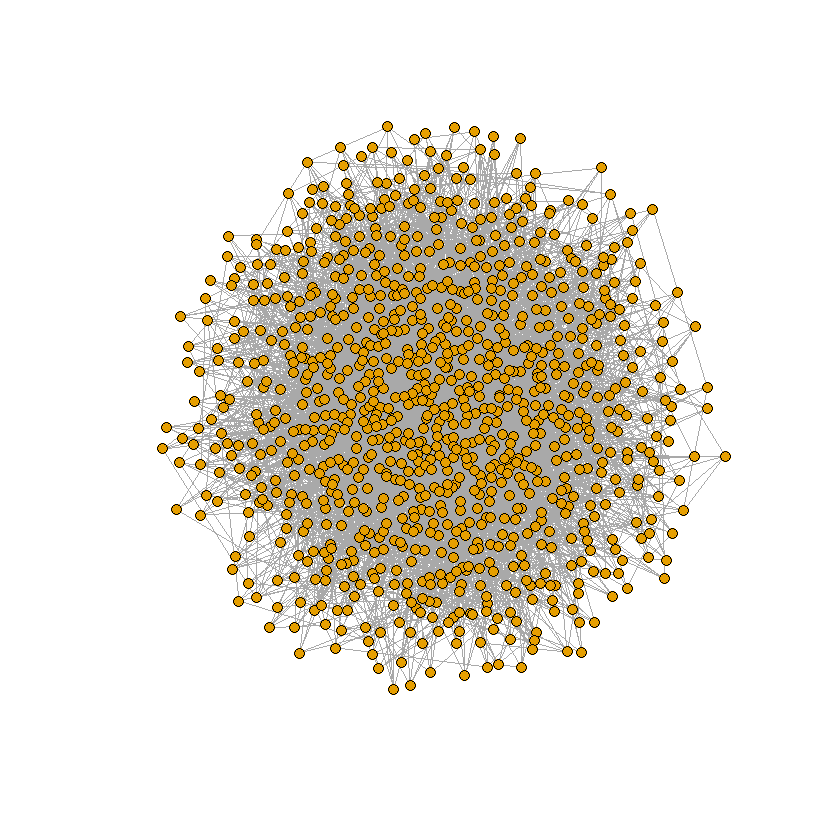

In [132]:
g<-barabasi.game(1000,m=5,directed=F)
plot(g,vertex.size=4,vertex.label=NA,edge.length=100)

In [133]:
fastgreedy.community(g)
modularity(fastgreedy.community(g))

IGRAPH clustering fast greedy, groups: 9, mod: 0.28
+ groups:
  $`1`
    [1]   4   6   7  11  12  13  25  35  37  39  40  43  44  49  51  61  63  65
   [19]  67  71  76  77  85  86  87  91  92  95  98 100 103 106 107 113 122 123
   [37] 127 130 136 145 149 150 158 162 167 168 180 182 183 187 219 225 230 234
   [55] 235 238 246 250 251 267 268 270 272 274 280 283 286 290 296 297 310 315
   [73] 317 319 324 332 334 336 339 341 346 352 354 355 356 357 359 360 361 363
   [91] 365 368 370 373 387 398 399 400 403 406 408 409 417 418 421 429 430 431
  [109] 432 446 448 449 450 460 462 471 473 478 479 487 489 493 503 510 511 513
  [127] 522 525 529 541 546 548 551 553 554 561 581 597 600 602 603 615 617 627
  [145] 630 639 643 644 656 658 659 661 665 669 675 684 687 696 698 702 713 714
  + ... omitted several groups/vertices

[1] 0.2827184

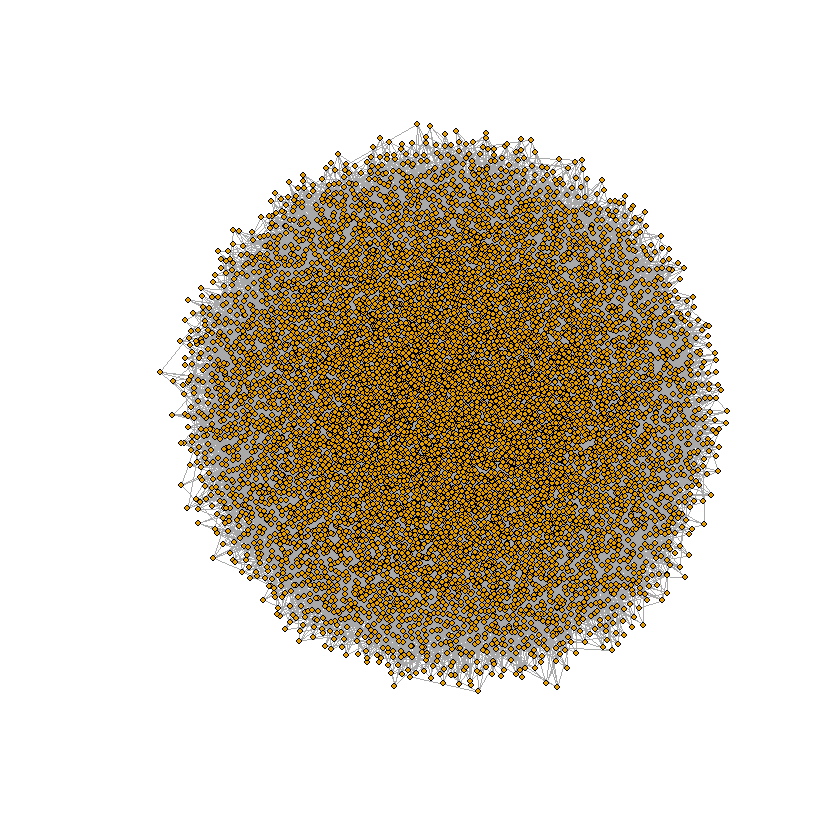

In [137]:
gg<-barabasi.game(10000,m=5,directed=F)
plot(gg,vertex.size=2,vertex.label=NA,edge.length=100)

In [138]:
fastgreedy.community(gg)
modularity(fastgreedy.community(gg))

IGRAPH clustering fast greedy, groups: 13, mod: 0.27
+ groups:
  $`1`
    [1]  292  325  475  491  533  569  656  745  766  788  793  828  870  874
   [15]  942  950  956  975  984 1032 1072 1088 1122 1152 1155 1158 1179 1193
   [29] 1206 1277 1309 1329 1338 1378 1406 1409 1416 1420 1442 1450 1572 1595
   [43] 1600 1662 1674 1697 1700 1737 1740 1747 1769 1780 1794 1800 1842 1846
   [57] 1866 1868 1875 1923 1948 1965 1966 1980 1990 1993 2003 2051 2064 2172
   [71] 2222 2238 2254 2261 2262 2317 2351 2357 2358 2378 2430 2463 2465 2474
   [85] 2477 2506 2556 2560 2600 2630 2672 2685 2713 2732 2739 2778 2855 2898
   [99] 2899 2964 2997 3001 3028 3084 3086 3136 3152 3154 3158 3172 3182 3205
  [113] 3209 3249 3260 3334 3349 3358 3374 3406 3416 3417 3418 3433 3439 3441
  + ... omitted several groups/vertices

[1] 0.2747241

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"38 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"227 y values <= 0 omitted from logarithmic plot"

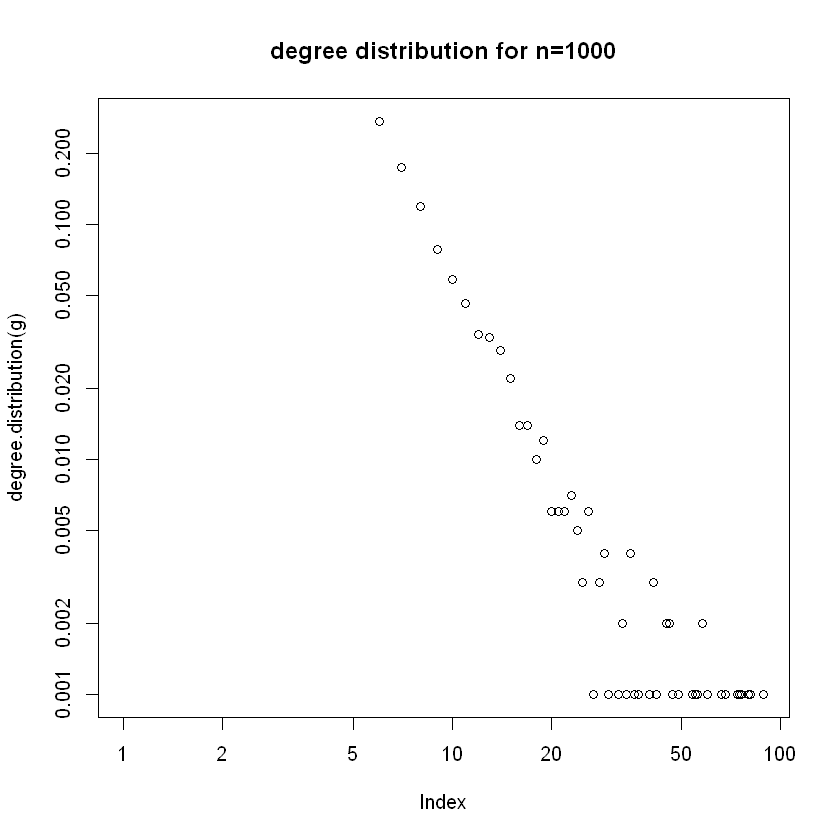

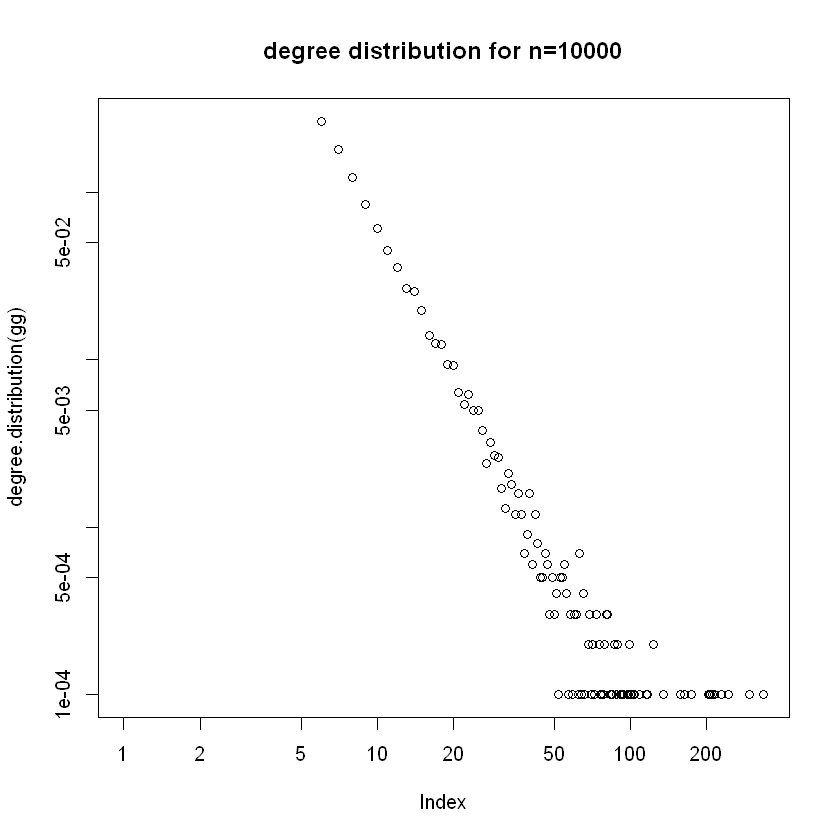

In [140]:
plot(degree.distribution(g),main="degree distribution for n=1000", log="xy")
plot(degree.distribution(gg),main="degree distribution for n=10000", log="xy")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"16 x values <= 0 omitted from logarithmic plot"

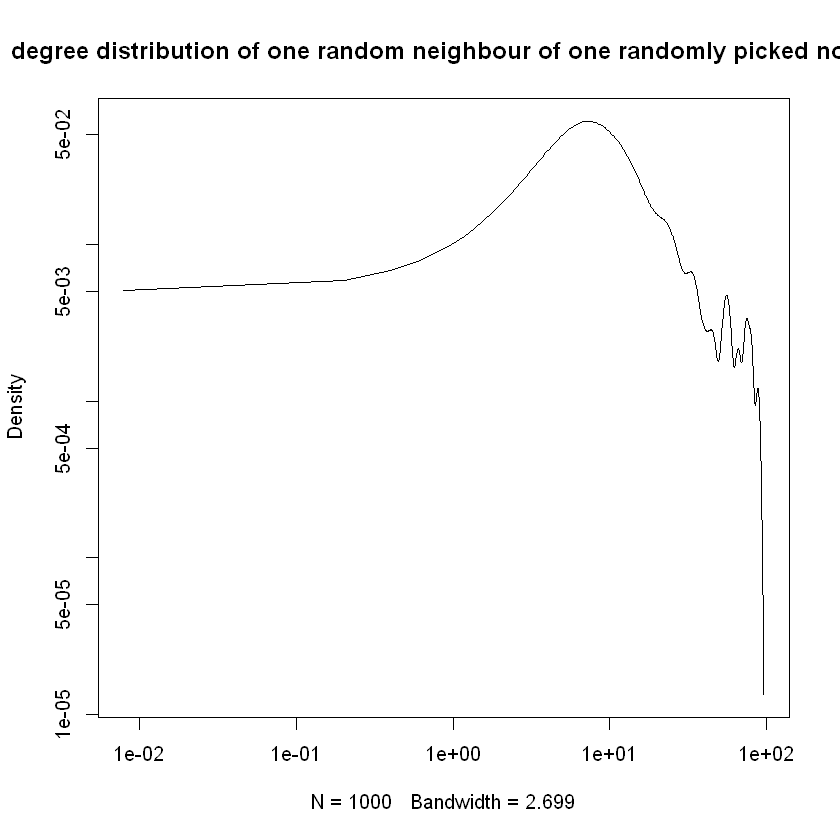

In [141]:
deg=numeric(0)
for (i in 1:1000){
    nod1<-sample(1000,1)
    neigh<-neighbors(g,nod1)
    nod2<-sample(length(neigh),1)
    nod2<-neigh[nod2]
    deg<-c(deg,degree(g,nod2))
}
    plot(density(deg),log="xy",main="degree distribution of one random neighbour of one randomly picked node")

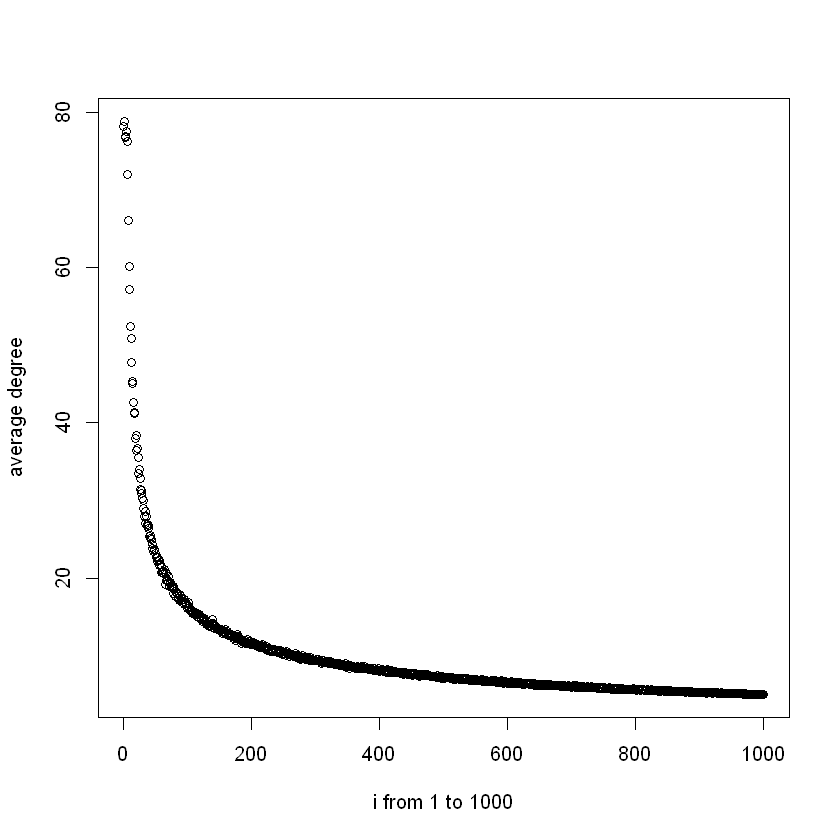

In [160]:
deg<-numeric(0)
for (i in 1:1000)
    deg[i]<-0
for(n in 1:500){
    g<-barabasi.game(1000,m=5,directed=F)
    for (i in 1:1000){
        deg[i]<-deg[i]+degree(g,i)
    }
}
exp_deg=deg/500
plot(exp_deg,ylab="average degree",xlab="i from 1 to 1000")